### **ICESat数据查看**

In [18]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyrsimg import readTiff, imgShow


In [19]:
path_atl06 = 'data/laser/processed_ATL06_20200806013350_06370802_006_01.h5'
path_rsimg = 'data/rsimg/s2_gla_region_20220707.tif'


In [20]:
!h5ls $path_atl06
# !h5ls $path_atl06/gt2l/land_ice_segments
# !h5ls $path_atl06/orbit_info


METADATA                 Group
ancillary_data           Group
gt1l                     Group
gt1r                     Group
gt2l                     Group
gt2r                     Group
gt3l                     Group
gt3r                     Group
orbit_info               Group
quality_assessment       Group


In [21]:
with h5py.File(path_atl06,'r') as setp_atl06:
    ## gt1l
    lat_gt1l = setp_atl06['gt1l/land_ice_segments/latitude'][:]
    lon_gt1l = setp_atl06['gt1l/land_ice_segments/longitude'][:]
    elev_gt1l = setp_atl06['gt1l/land_ice_segments/h_li'][:]
    # ## group attributes
    beam_type_gt1l = setp_atl06['gt1l'].attrs["atlas_beam_type"].decode()
    ## gt1r
    lat_gt1r = setp_atl06['gt1r/land_ice_segments/latitude'][:]
    lon_gt1r = setp_atl06['gt1r/land_ice_segments/longitude'][:]
    elev_gt1r = setp_atl06['gt1r/land_ice_segments/h_li'][:]
    beam_type_gt1r = setp_atl06['gt1r'].attrs["atlas_beam_type"].decode()
    ## gt3r
    lat_gt3r = setp_atl06['gt3r/land_ice_segments/latitude'][:]
    lon_gt3r = setp_atl06['gt3r/land_ice_segments/longitude'][:]
    elev_gt3r = setp_atl06['gt3r/land_ice_segments/h_li'][:]
    beam_type_gt3r = setp_atl06['gt3r'].attrs["atlas_beam_type"].decode()
    ## orbit information.
    cycle = setp_atl06['orbit_info/cycle_number'][0]
    track = setp_atl06['orbit_info/rgt'][0]
    orient = setp_atl06['orbit_info/sc_orient'][0]

## 2. remote sensing image
rsimg = readTiff(path_rsimg)



Text(0.5, 1.0, 'icesat-2')

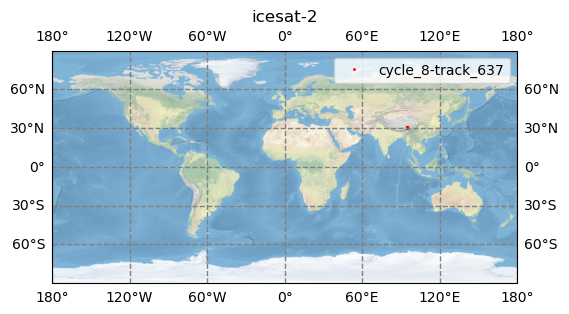

In [22]:
proj = ccrs.PlateCarree(central_longitude=0.0)
fig = plt.figure(figsize=(6, 6))
orbit_isat = 'cycle_'+str(cycle)+'-track_'+str(track)
ax = fig.add_subplot(111, projection=proj);
ax.stock_img()
ax.plot(lon_gt1l, lat_gt1l, marker='.', markersize=2, linewidth=0.0, label=orbit_isat, color='red')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='--')
ax.legend();
plt.title('icesat-2')


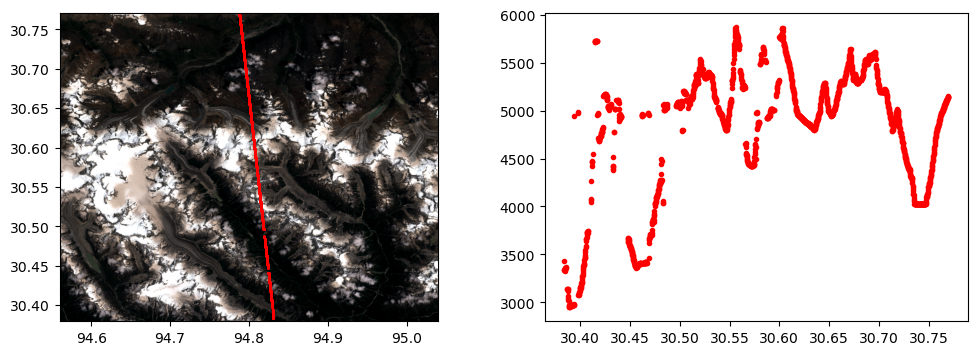

In [23]:
region = [94.56, 30.38, 95.04, 30.77]
### gt1l
ids_gt1l = np.where((lat_gt1l>region[1]) & (lat_gt1l<region[3]) & \
               (lon_gt1l>region[0]) & (lon_gt1l<region[2]) & \
                (elev_gt1l<9000))
fig, ax = plt.subplots(1,2, figsize=(12, 4))
imgShow(rsimg.array, extent=rsimg.geoextent, clip_percent=5, ax=ax[0])
ax[0].scatter(x=lon_gt1l[ids_gt1l], y=lat_gt1l[ids_gt1l], s=1, color='red')
ax[1].plot(lat_gt1l[ids_gt1l], elev_gt1l[ids_gt1l], 'r.')



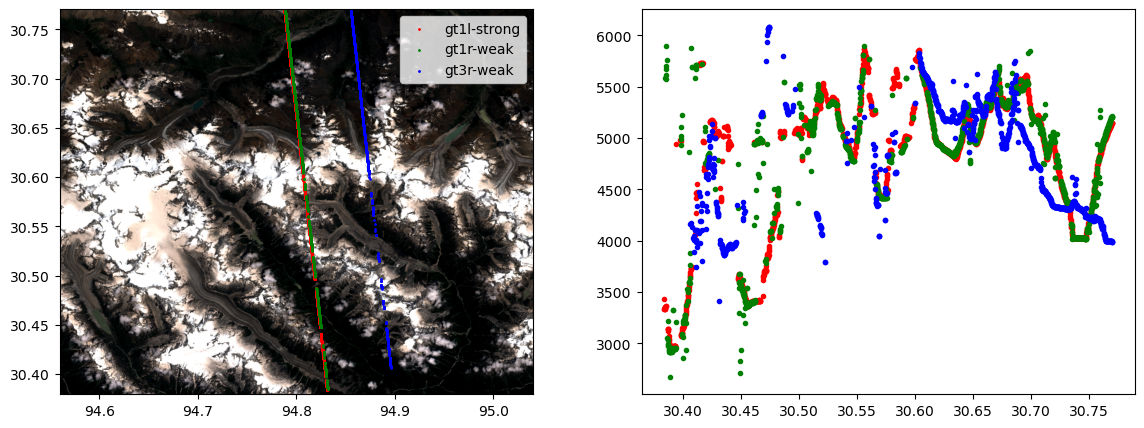

In [24]:
### gt1l vs. gt1r, gt3r
ids_gt1l = np.where((lat_gt1l>region[1]) & (lat_gt1l<region[3]) & \
               (lon_gt1l>region[0]) & (lon_gt1l<region[2]) & \
                (elev_gt1l<9000))
ids_gt1r = np.where((lat_gt1r>region[1]) & (lat_gt1r<region[3]) & \
               (lon_gt1r>region[0]) & (lon_gt1r<region[2]) & \
                (elev_gt1r<9000))
ids_gt3r = np.where((lat_gt3r>region[1]) & (lat_gt3r<region[3]) & \
               (lon_gt3r>region[0]) & (lon_gt3r<region[2]) & \
                (elev_gt3r<9000))
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
imgShow(rsimg.array, extent=rsimg.geoextent, clip_percent=10, ax=ax[0])
ax[0].scatter(x=lon_gt1l[ids_gt1l], y=lat_gt1l[ids_gt1l], s=1, color='red', label='gt1l-'+beam_type_gt1l)
ax[0].scatter(x=lon_gt1r[ids_gt1r], y=lat_gt1r[ids_gt1r], s=1, color='green', label='gt1r-'+beam_type_gt1r)
ax[0].scatter(x=lon_gt3r[ids_gt3r], y=lat_gt3r[ids_gt3r], s=1, color='blue', label='gt3r-'+beam_type_gt1r)
ax[0].legend()
ax[1].plot(lat_gt1l[ids_gt1l], elev_gt1l[ids_gt1l], '.', color='red', label='gt1l-'+beam_type_gt1l)
ax[1].plot(lat_gt1r[ids_gt1r], elev_gt1r[ids_gt1r], '.', color='green', label='gt1r-'+beam_type_gt1r)
ax[1].plot(lat_gt3r[ids_gt3r], elev_gt3r[ids_gt3r], '.', color='blue', label='gt3r-'+beam_type_gt3r)

